## 1. Clasificación con Árboles de Decisión (Iris Dataset)

**Concepto:** Un **Árbol de Decisión** es un algoritmo de aprendizaje supervisado que puede usarse tanto para clasificación como para regresión. Funciona dividiendo el conjunto de datos en subconjuntos cada vez más pequeños basándose en reglas de decisión "if-then-else" aprendidas de las características de los datos.

**En este ejemplo:**
*   **Objetivo:** Clasificar tipos de flores Iris basándose en sus medidas.
*   **Librería:** Usamos `DecisionTreeClassifier` de Scikit-Learn.
*   **Visualización:** Usamos `plot_tree` para ver gráficamente cómo el modelo toma decisiones (ej. "¿Es el ancho del pétalo <= 0.8?").


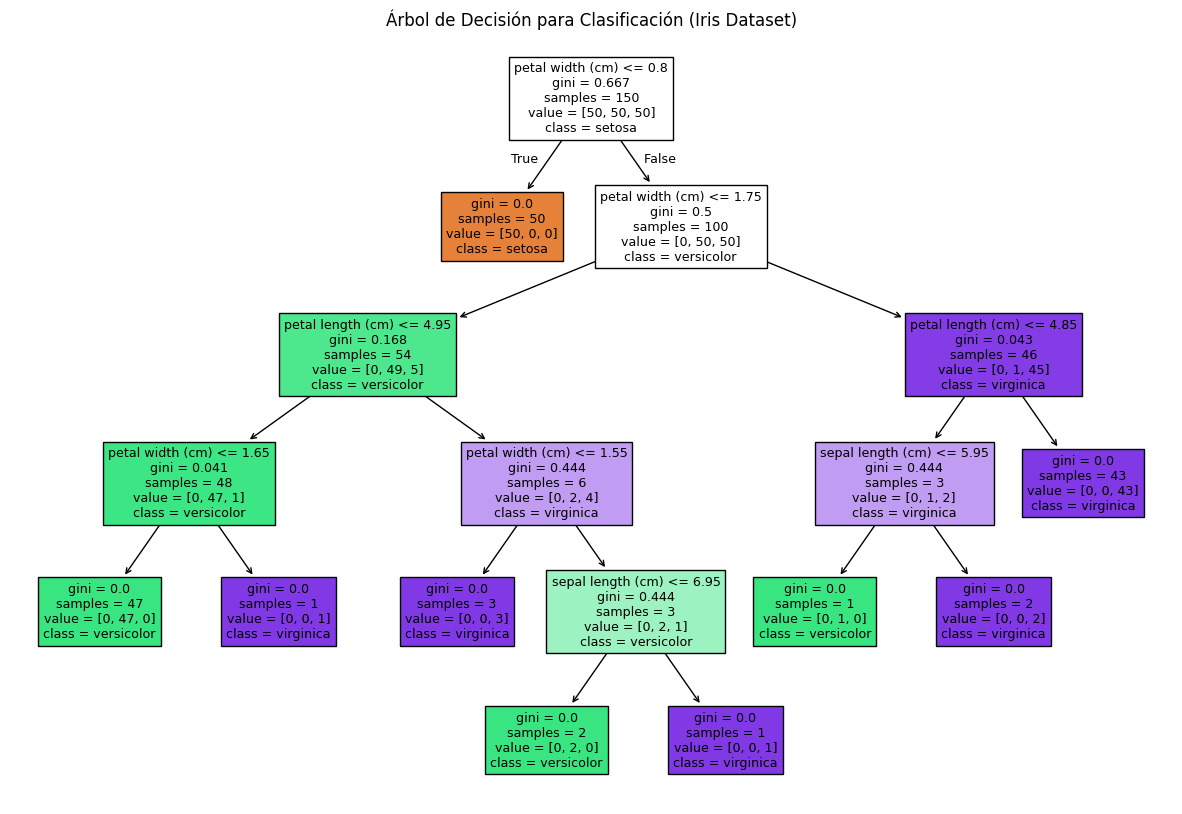

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Crear un clasificador de árbol de decisión para clasificación

clf_classification = DecisionTreeClassifier()
clf_classification.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(
    clf_classification, 
    feature_names=iris.feature_names,
    class_names=iris.target_names, 
    filled=True
)
plt.title('Árbol de Decisión para Clasificación (Iris Dataset)')
plt.show()

## 2. Regresión con Árboles de Decisión (Diabetes Dataset)

**Concepto:** Cuando la variable que queremos predecir es **numérica continua** (como el precio de una casa o la progresión de una enfermedad), hablamos de **Regresión**.

**En este ejemplo:**
*   **Objetivo:** Predecir la progresión de la diabetes.
*   **Modelo:** `DecisionTreeRegressor`.
*   **Hiperparámetro `max_depth`:** Limitamos la profundidad del árbol a 2 (`max_depth=2`). Esto es importante para evitar el **Overfitting** (sobreajuste), donde el modelo memoriza los datos de entrenamiento en lugar de aprender patrones generales. Un árbol más simple es más fácil de interpretar.


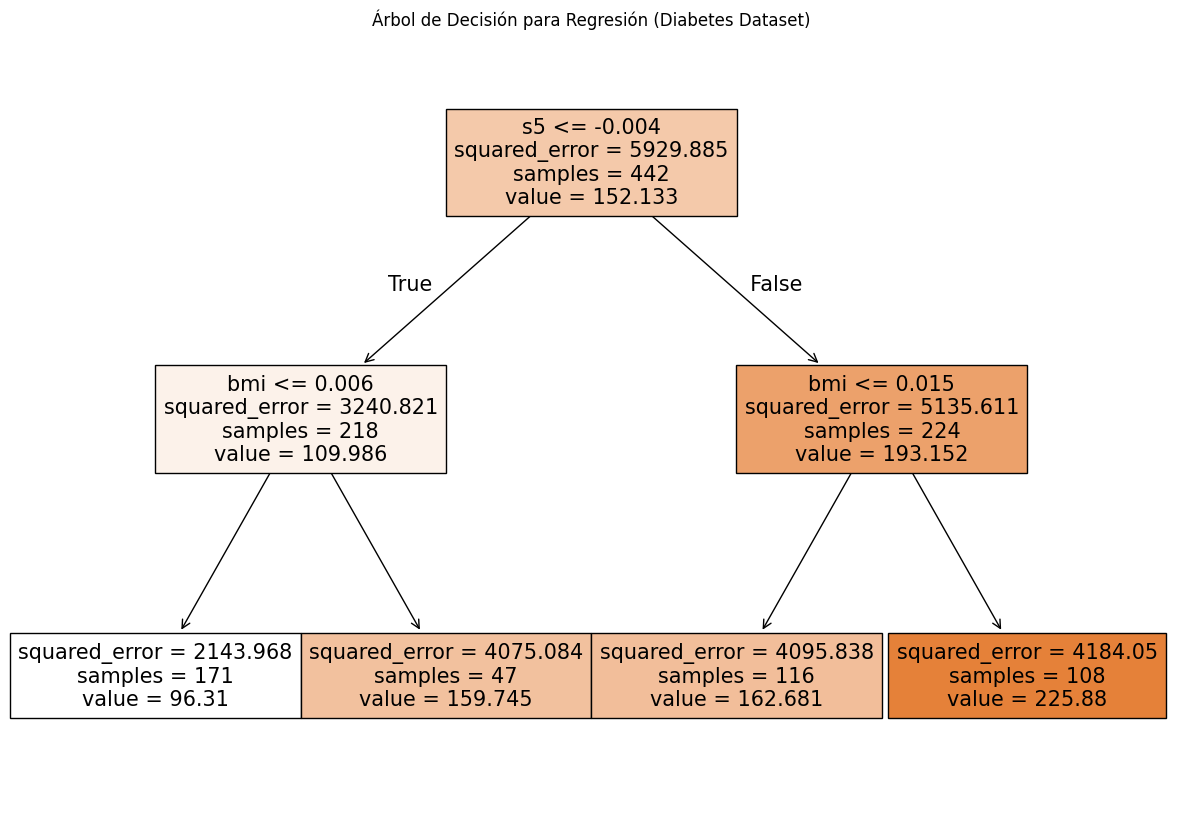

In [8]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Crear un regresor de árbol de decisión con profundidad máxima de 2

clf_regression_small = DecisionTreeRegressor(max_depth=2)
clf_regression_small.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))

plot_tree(
    clf_regression_small, 
    feature_names=diabetes.feature_names, 
    filled=True
)

plt.title('Árbol de Decisión para Regresión (Diabetes Dataset)')
plt.show()

## 3. Selección de Características y Profundidad (Breast Cancer Dataset)

**Concepto:** Los árboles de decisión realizan una **selección de características implícita**. Las características más importantes (las que mejor separan las clases) tienden a aparecer en la parte superior del árbol (la raíz).

**En este ejemplo:**
*   **Dataset:** Cáncer de mama (clasificación binaria: maligno vs benigno).
*   **Profundidad:** Aumentamos `max_depth` a 3. Observa cómo el árbol se vuelve más complejo para capturar detalles más finos en los datos.


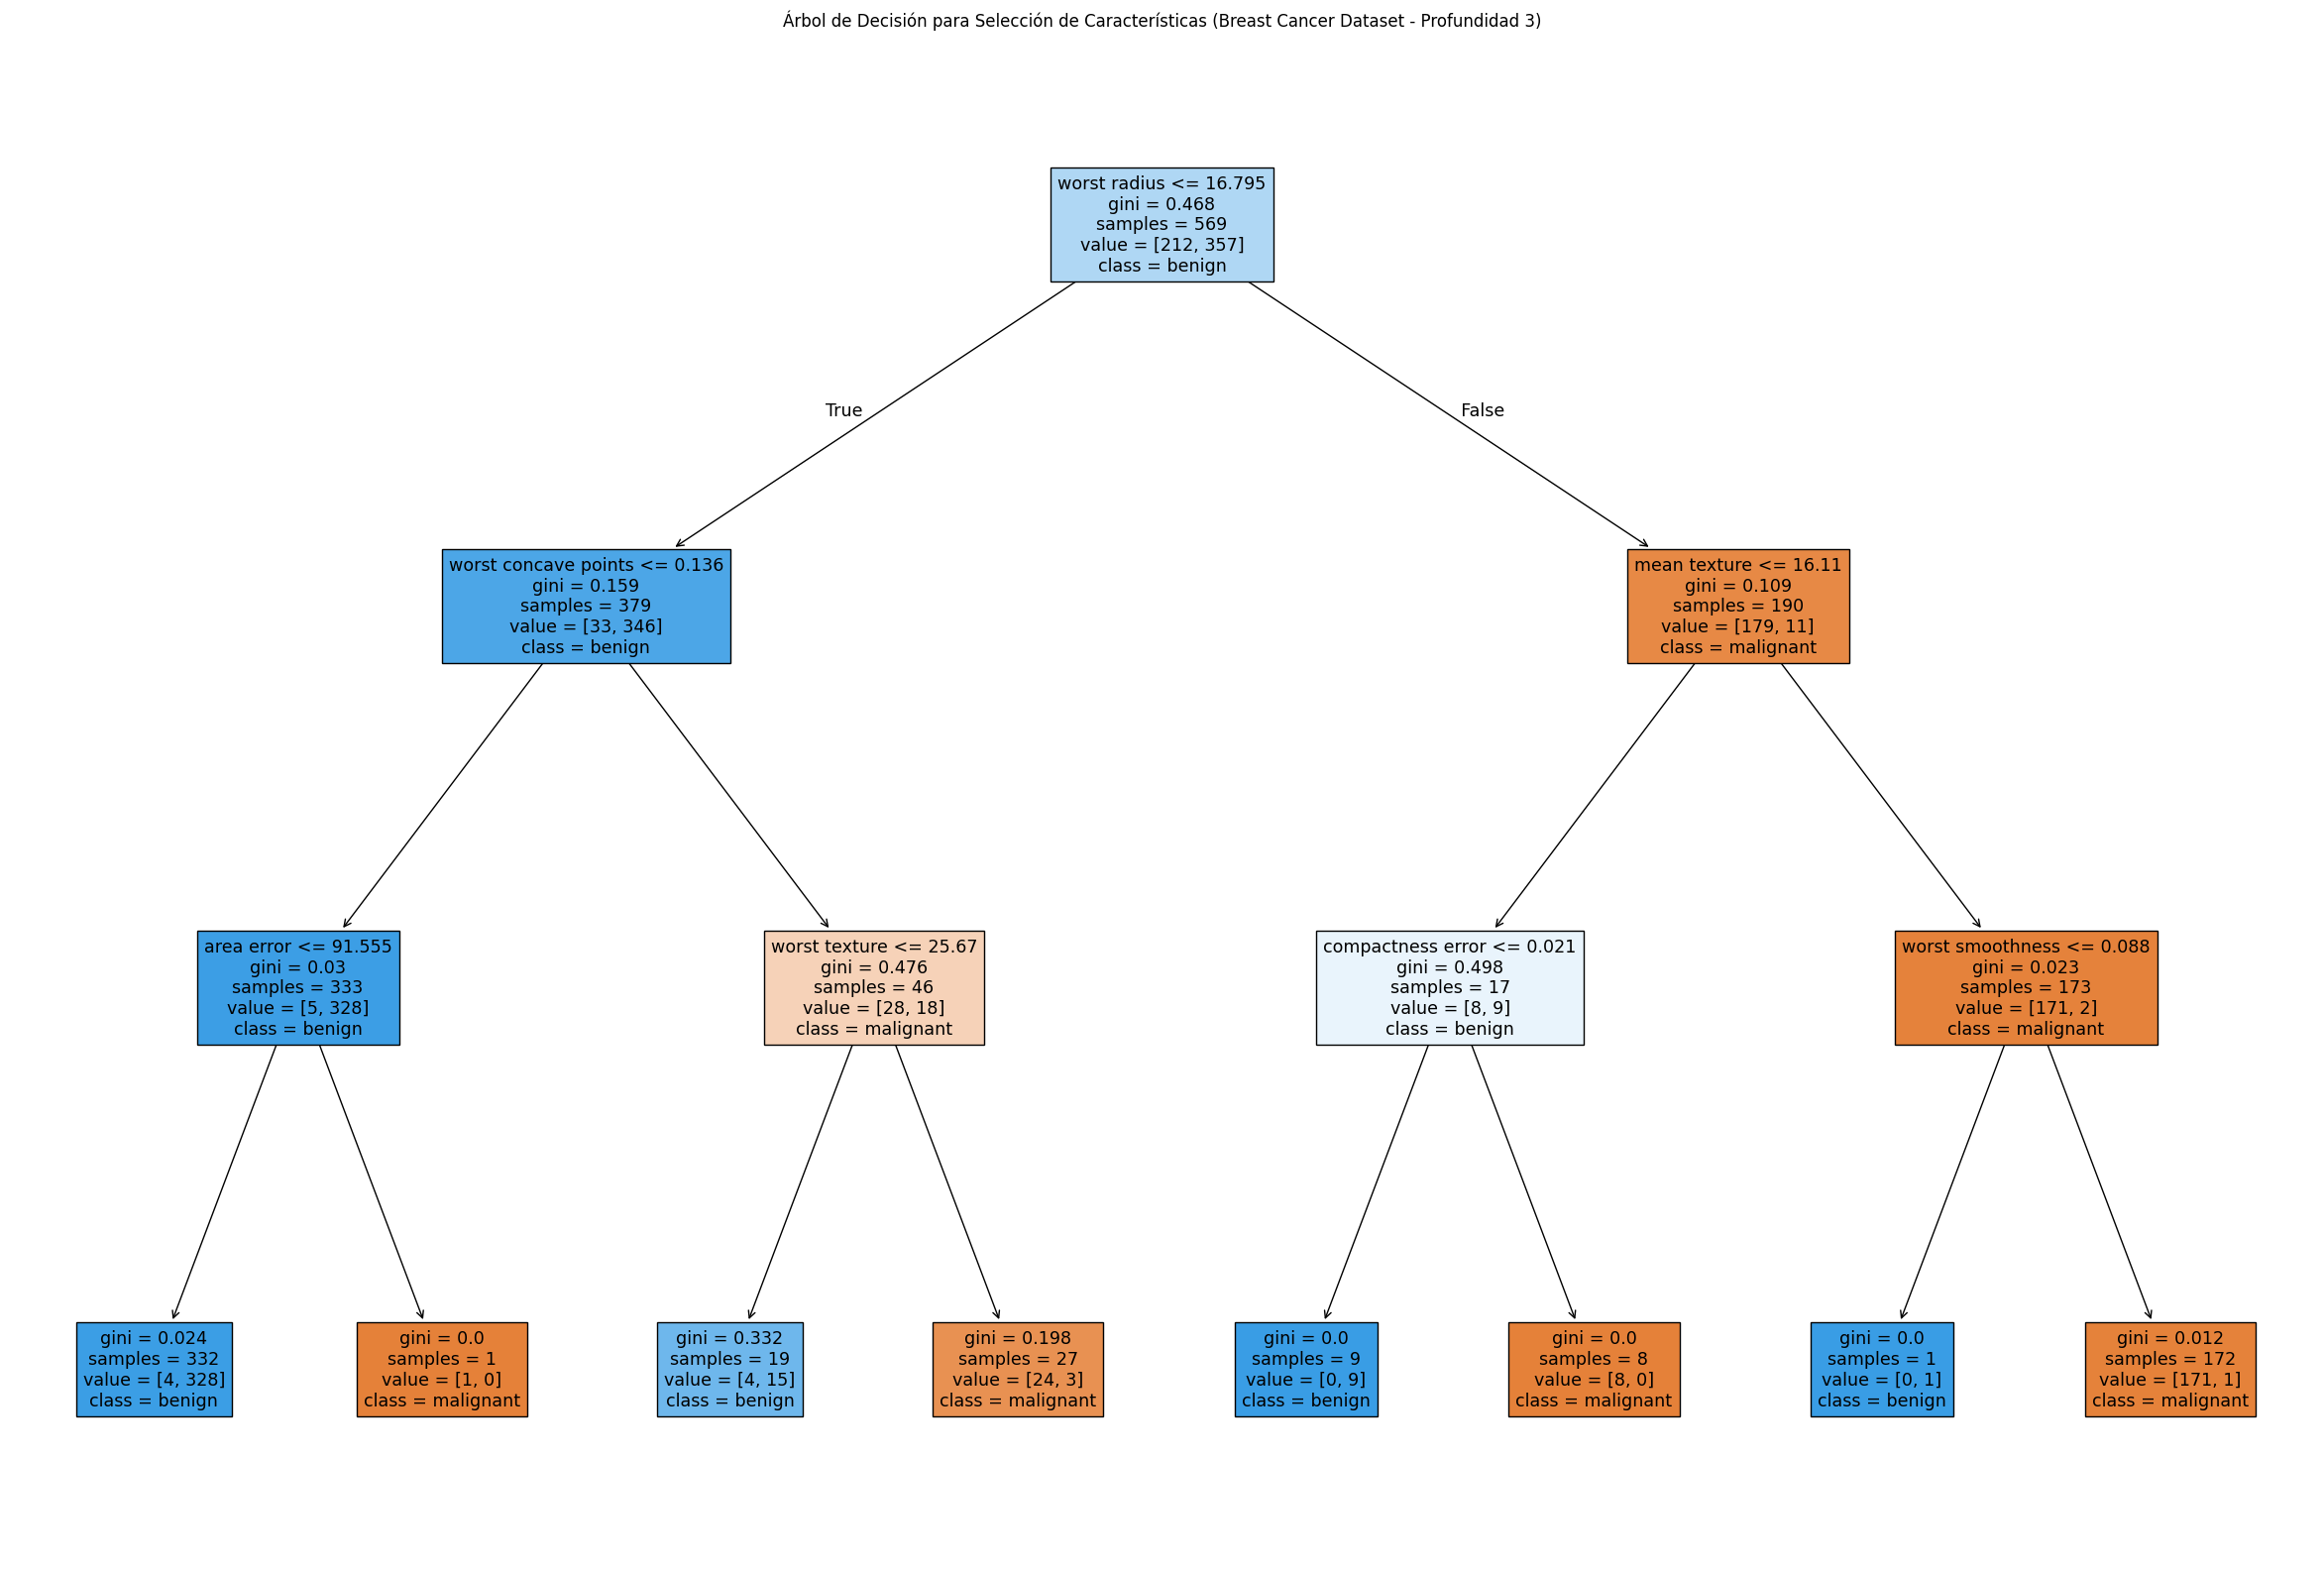

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Breast Cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Crear un clasificador de árbol de decisión limitado a 3 niveles

clf_feature_selection_depth_3 = DecisionTreeClassifier(max_depth=3)
clf_feature_selection_depth_3.fit(X, y)

# Visualizar el árbol de decisión

plt.figure(figsize=(30, 20))

plot_tree(
    clf_feature_selection_depth_3, 
    feature_names=cancer.feature_names, 
    class_names=cancer.target_names, 
    filled=True
)

plt.title('Árbol de Decisión para Selección de Características (Breast Cancer Dataset - Profundidad 3)')
plt.show()

## 4. Evaluación Rigurosa: Entrenamiento y Prueba (Train/Test Split)

**Concepto:** Para confiar en un modelo, debemos evaluarlo con datos que **nunca ha visto**. Si evaluamos con los mismos datos de entrenamiento, el modelo parecerá perfecto (hizo trampa/memorizó).

**Pasos Clave:**
1.  **`train_test_split`:** Dividimos los datos en:
    *   **Train (80%):** Para entrenar el modelo.
    *   **Test (20%):** Para evaluar su desempeño real.
2.  **Métricas de Evaluación:**
    *   **Accuracy:** ¿Qué porcentaje predijo correctamente?
    *   **Classification Report:** Detalles de precisión y exhaustividad por clase.
3.  **Predicción:** Al final, usamos el modelo para predecir la clase de una flor nueva inventada ("W").


Accuracy: 0.9666666666666667

Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



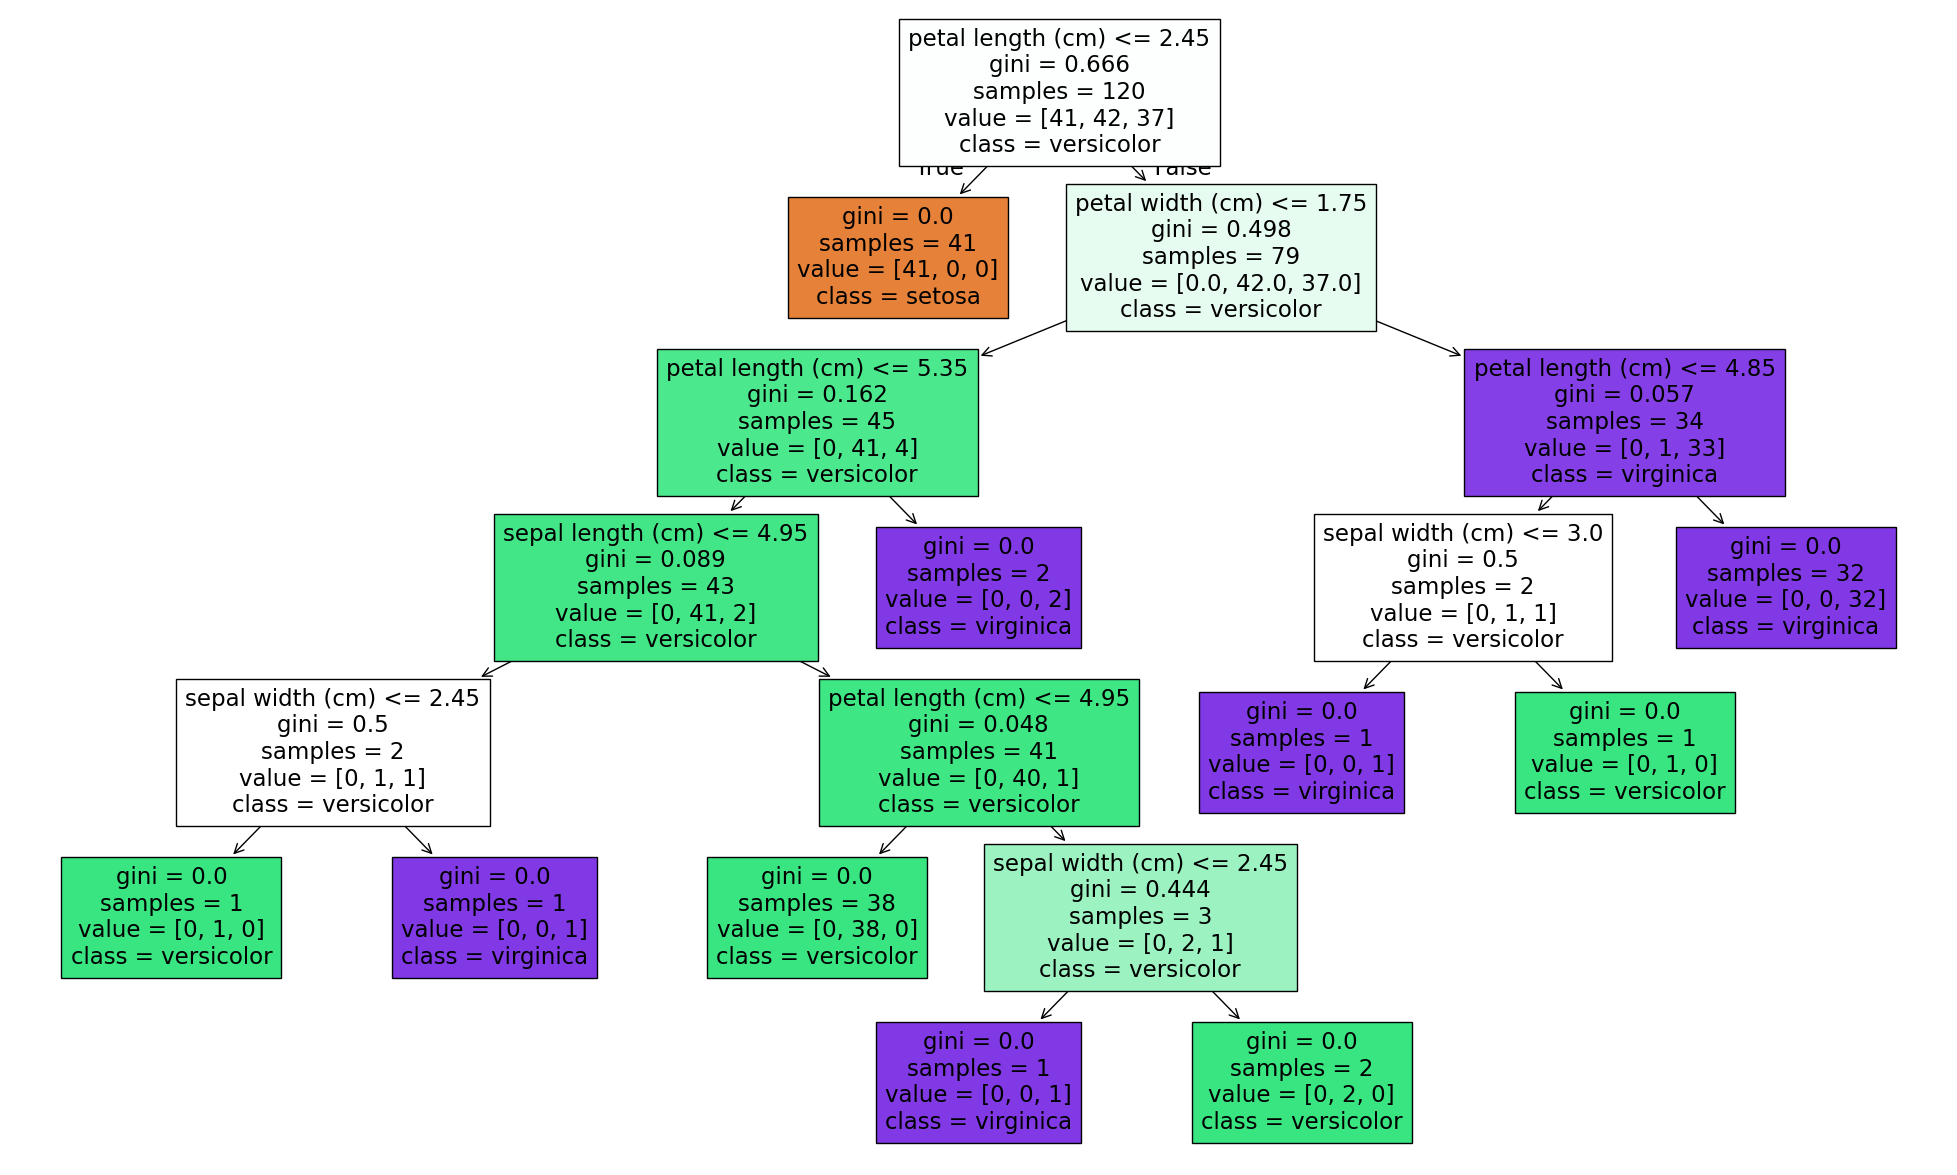

Predicción numérica para W: [1]
Clase predicha: versicolor


In [1]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Cargar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en entrenamiento y prueba
# random_state=13 asegura que siempre se separen los datos de la misma forma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Crear y entrenar el árbol
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Hacer predicciones para evaluar
y_pred = modelo.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualizar el árbol de decisión
plt.figure(figsize=(25, 15))
plot_tree(
    modelo, 
    filled=True, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names
)
plt.show()

# --- PRONÓSTICO DE UNA NUEVA MUESTRA ---

# Definimos una nueva flor "W" con medidas específicas:
# [Sépalo Largo, Sépalo Ancho, Pétalo Largo, Pétalo Ancho]
W = [5.8, 2.8, 4.0, 1.2]

# Predecimos la clase de W
# Nota: Usamos [W] (doble corchete) porque el modelo espera una lista de muestras
W_Test = modelo.predict([W])

print(f"Predicción numérica para W: {W_Test}")
print(f"Clase predicha: {iris.target_names[W_Test][0]}")

## 5. Proyecto Completo de Data Science: Titanic

Este ejercicio simula un flujo de trabajo real de un Científico de Datos.

**Fases del Proceso:**

1.  **Carga de Datos:** Obtenemos los datos crudos (desde una URL en este caso).
2.  **Limpieza y Preprocesamiento (Data Cleaning):**
    *   Eliminar columnas que no aportan valor predictivo (`Name`, `Fare`).
    *   **One-Hot Encoding:** Convertir variables categóricas (texto como 'male'/'female') a números (0/1) usando `get_dummies`, ya que los modelos matemáticos solo entienden números.
3.  **Balanceo de Clases:**
    *   El dataset está desbalanceado (muchos más fallecidos que sobrevivientes).
    *   Usamos `RandomUnderSampler` para igualar las clases y evitar que el modelo se sesgue hacia "No sobrevivió".
4.  **Optimización de Hiperparámetros (GridSearch):**
    *   En lugar de elegir `max_depth` al azar, usamos `GridSearchCV` para probar múltiples combinaciones y encontrar la configuración óptima matemáticamente.
5.  **Interpretabilidad:**
    *   Analizamos la **Importancia de las Características** para entender *qué* factores (Edad, Sexo, Clase) fueron determinantes para sobrevivir.


--- Primeras filas del dataset original ---


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708



Dimensiones del dataset: (887, 6)

--- Información de tipos de datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   ParCh     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB

--- Dataset procesado ---


,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0


--- Primeras filas del dataset original ---


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708



Dimensiones del dataset: (887, 6)

--- Información de tipos de datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   ParCh     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB

--- Dataset procesado ---


,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0



Proporción de supervivencia original:
Survived
0    0.614431
1    0.385569
Name: proportion, dtype: float64

Proporción de supervivencia después del balanceo:
Survived
0    0.5
1    0.5
Name: proportion, dtype: float64

--- Resultados del Grid Search ---
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.7951851851851852

--- Matriz de Confusión ---

--- Resultados del Grid Search ---
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.7951851851851852

--- Matriz de Confusión ---


--- Primeras filas del dataset original ---


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708



Dimensiones del dataset: (887, 6)

--- Información de tipos de datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   ParCh     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB

--- Dataset procesado ---


,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0



Proporción de supervivencia original:
Survived
0    0.614431
1    0.385569
Name: proportion, dtype: float64

Proporción de supervivencia después del balanceo:
Survived
0    0.5
1    0.5
Name: proportion, dtype: float64

--- Resultados del Grid Search ---
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.7951851851851852

--- Matriz de Confusión ---

--- Resultados del Grid Search ---
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.7951851851851852

--- Matriz de Confusión ---


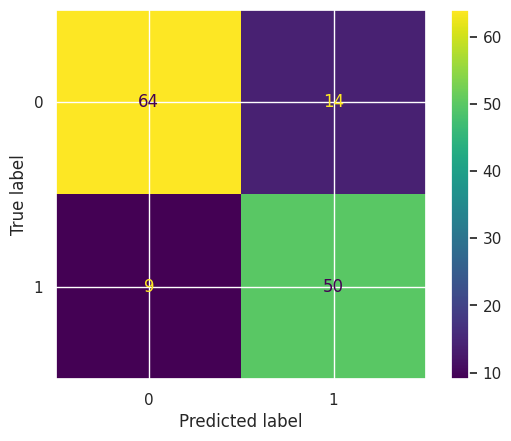

El accuracy en train es: 0.8410
El accuracy en test es: 0.8321


--- Primeras filas del dataset original ---


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708



Dimensiones del dataset: (887, 6)

--- Información de tipos de datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   ParCh     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB

--- Dataset procesado ---


,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0



Proporción de supervivencia original:
Survived
0    0.614431
1    0.385569
Name: proportion, dtype: float64

Proporción de supervivencia después del balanceo:
Survived
0    0.5
1    0.5
Name: proportion, dtype: float64

--- Resultados del Grid Search ---
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.7951851851851852

--- Matriz de Confusión ---

--- Resultados del Grid Search ---
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.7951851851851852

--- Matriz de Confusión ---


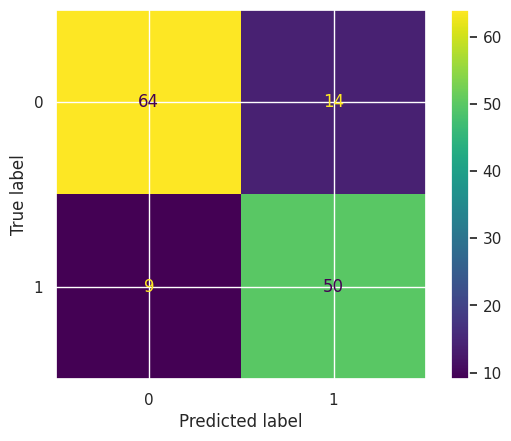

El accuracy en train es: 0.8410
El accuracy en test es: 0.8321


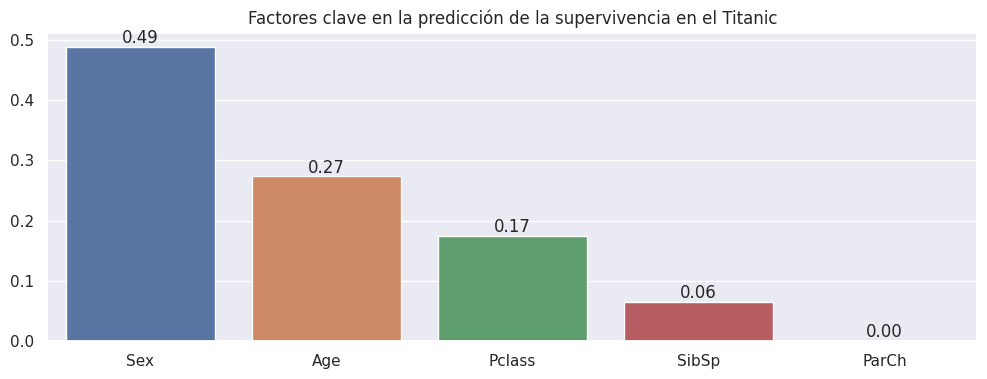

--- Primeras filas del dataset original ---


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708



Dimensiones del dataset: (887, 6)

--- Información de tipos de datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   ParCh     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB

--- Dataset procesado ---


,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0



Proporción de supervivencia original:
Survived
0    0.614431
1    0.385569
Name: proportion, dtype: float64

Proporción de supervivencia después del balanceo:
Survived
0    0.5
1    0.5
Name: proportion, dtype: float64

--- Resultados del Grid Search ---
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.7951851851851852

--- Matriz de Confusión ---

--- Resultados del Grid Search ---
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.7951851851851852

--- Matriz de Confusión ---


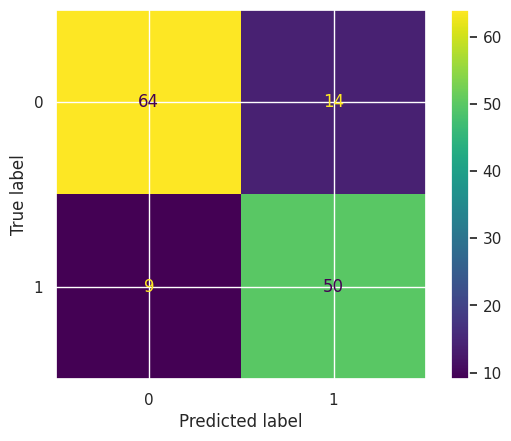

El accuracy en train es: 0.8410
El accuracy en test es: 0.8321


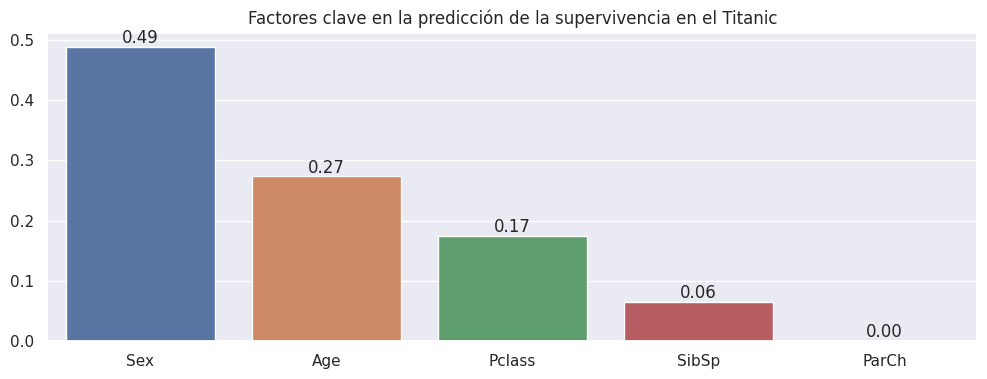

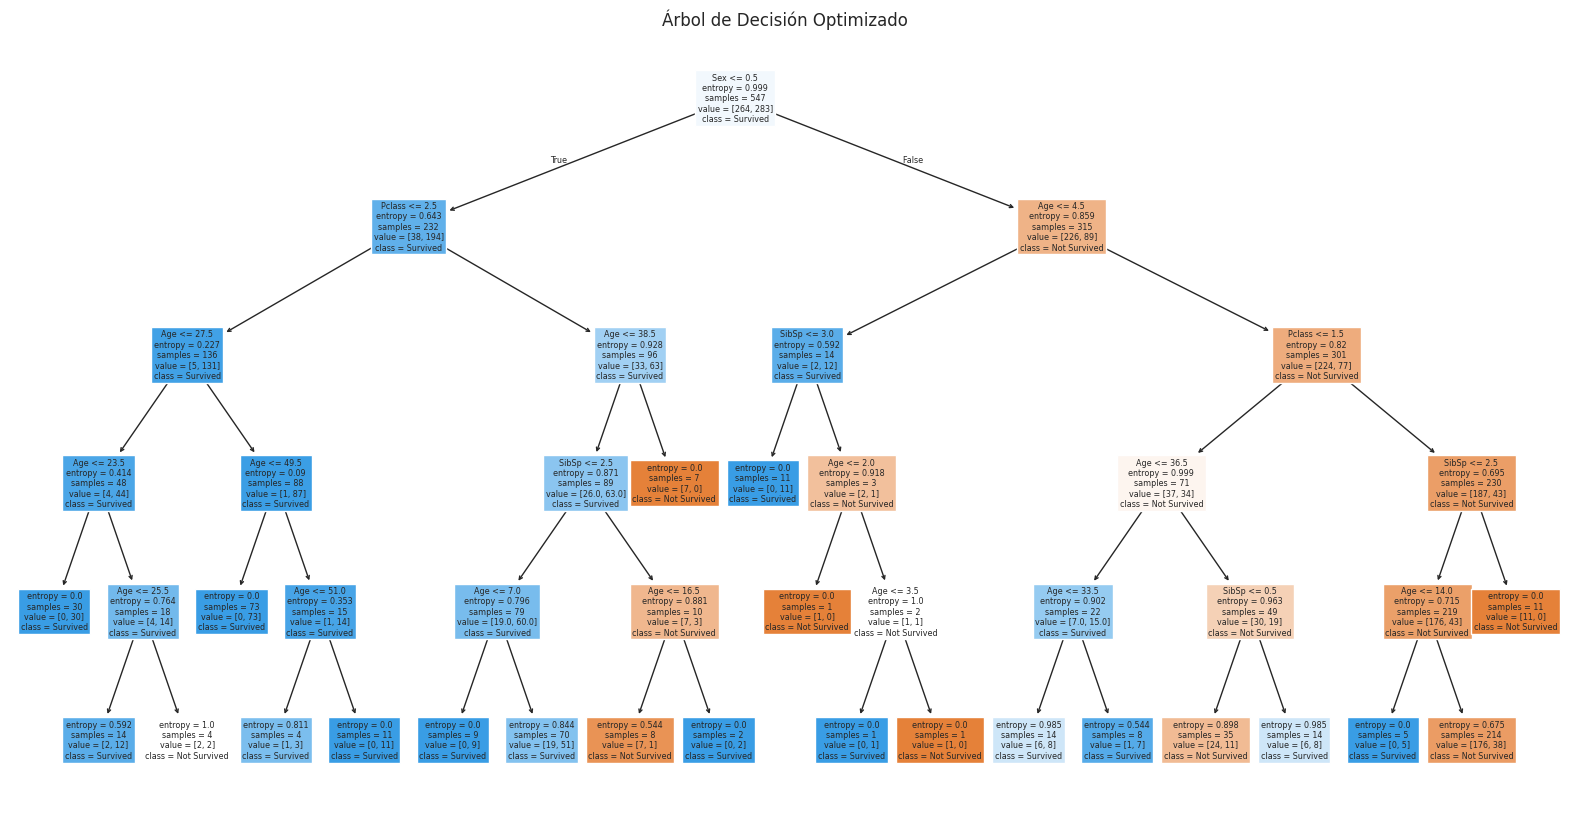


--- Predicción para nueva muestra ---
Datos del pasajero: [1, 0, 35, 0, 0]
Predicción (0=No Sobrevive, 1=Sobrevive): 1

--- Predicción para nueva muestra ---
Datos del pasajero: [3, 1, 35, 0, 0]
Predicción (0=No Sobrevive, 1=Sobrevive): 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [11]:
# Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import os
sns.set(context='notebook')

# --- 1. CARGA DE DATOS ---
# Carga del conjunto de datos desde URL
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic = pd.read_csv(url)

# Mirar encabezado con los datos
print("--- Primeras filas del dataset original ---")
display(titanic.head(10))

# --- 2. LIMPIEZA DE DATOS ---
# Eliminamos las columnas que no nos interesan para la predicción
titanic.drop(
    ['Name', 'Fare'],
    axis=1,
    inplace=True)

# Renombramos las columnas para que sean más cortas y manejables
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'ParCh']

# Analizamos el shape del objeto
print(f"\nDimensiones del dataset: {titanic.shape}")

# Visualizamos los tipos de datos
print("\n--- Información de tipos de datos ---")
titanic.info()

# --- TRANSFORMACIÓN DE VARIABLES (ENCODING) ---
# Cambiamos los tipos de datos de Sex (texto -> números)
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

# Renombramos columna Sex_male a Sex para claridad (1 = Male, 0 = Female)
titanic.rename(columns={'Sex_male':'Sex'}, inplace=True)

# Ordenar columnas por nombres para mantener orden lógico
titanic = titanic[['Survived','Pclass','Sex','Age','SibSp','ParCh']]

print("\n--- Dataset procesado ---")
display(titanic.head())

# Vemos la proporción de la variable objetivo (Desbalanceada)
print("\nProporción de supervivencia original:")
print(titanic.Survived.value_counts(normalize=True))

# --- 3. BALANCEO DE DATOS ---
# Importamos librería para balancear los datos
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

# Separamos en X (features) e y (target)
X_titanic = titanic.drop('Survived', axis=1)
y_titanic = titanic.Survived

# Balanceamos los datos (Undersampling de la clase mayoritaria)
X_over_titanic, y_over_titanic  = undersample.fit_resample(X_titanic,y_titanic)

print("\nProporción de supervivencia después del balanceo:")
print(y_over_titanic.value_counts(normalize=True))

# --- 4. DIVISIÓN TRAIN/TEST ---
from sklearn.model_selection import train_test_split

# 20% para test y 80% para train
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_over_titanic, y_over_titanic, test_size=0.20, random_state=42)

# --- 5. ENTRENAMIENTO Y GRID SEARCH ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6]} # Probamos varias profundidades

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_titanic, y_train_titanic)

# Imprimir los resultados
print("\n--- Resultados del Grid Search ---")
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

# --- 6. EVALUACIÓN ---
# Pronosticamos Y
y_train_pred_titanic = best_clf.predict(X_train_titanic)
y_test_pred_titanic = best_clf.predict(X_test_titanic)

# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test_titanic, y_test_pred_titanic, labels=best_clf.classes_)
print("\n--- Matriz de Confusión ---")
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()
plt.show()

# Calculo de las predicciones en Train y test
from sklearn.metrics import accuracy_score
print(f'El accuracy en train es: {accuracy_score(y_train_titanic, y_train_pred_titanic):.4f}')
print(f'El accuracy en test es: {accuracy_score(y_test_titanic, y_test_pred_titanic):.4f}')

# --- 7. IMPORTANCIA DE CARACTERÍSTICAS ---
feature_scores_titanic = pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train_titanic.columns).sort_values(ascending=False)).T

plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores_titanic)

for index, value in enumerate(feature_scores_titanic.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')

plt.title("Factores clave en la predicción de la supervivencia en el Titanic")
plt.show()

# --- 8. VISUALIZACIÓN DEL ÁRBOL ---
X_names = X_train_titanic.columns
y_names = ['Not Survived', 'Survived']
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(best_clf, feature_names=X_names, class_names=y_names, filled=True)
plt.title("Árbol de Decisión Optimizado")
plt.show()


# --- 9. PRONÓSTICO DE NUEVA MUESTRA ---
# Ejemplo: [Pclass, Sex(0=Fem, 1=Male), Age, SibSp, ParCh]
# Pasajero: Clase 1, Mujer (0), 35 años, 0 hermanos, 0 hijos
W = [1, 0, 35, 0, 0] 


W_Test = best_clf.predict([W])

print("\n--- Predicción para nueva muestra ---")
print(f"Datos del pasajero: {W}")
print(f"Predicción (0=No Sobrevive, 1=Sobrevive): {W_Test[0]}")
# Pasajero: Clase 3, Hombre (1), 35 años, 0 hermanos, 0 hijos
W_2 = [3, 1, 35, 0, 0] 
W_Test_2 = best_clf.predict([W_2])
print("\n--- Predicción para nueva muestra ---")
print(f"Datos del pasajero: {W_2}")
print(f"Predicción (0=No Sobrevive, 1=Sobrevive): {W_Test_2[0]}")



## 6. Proyecto: Clasificación de Calidad de Autos (Car Evaluation)

**Objetivo:** Construir un modelo que pueda clasificar la aceptabilidad de un automóvil (inaceptable, aceptable, bueno, muy bueno) basándose en sus características técnicas y de precio.

**Dataset:** "Car Evaluation Data Set" (descargado desde Kaggle).
**Características:**
*   `price`: Precio de compra.
*   `maint`: Costo de mantenimiento.
*   `doors`: Número de puertas.
*   `persons`: Capacidad de personas.
*   `lug_boot`: Tamaño del maletero.
*   `safety`: Nivel de seguridad.

**Desafíos:**
*   Todas las variables son categóricas (texto), por lo que necesitaremos codificarlas numéricamente (`OrdinalEncoder`).
*   El dataset puede estar desbalanceado.


In [18]:
# --- 1. CARGA DE DATOS (KAGGLE) ---
# Instalamos la librería de Kaggle si no está presente
# %pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

# Descargamos el dataset
print("Descargando dataset desde Kaggle...")
path = kagglehub.dataset_download("elikplim/car-evaluation-data-set")
print(f"Dataset descargado en: {path}")

# Cargamos el CSV
# El dataset original no tiene encabezados, así que los definimos manualmente
df_car = pd.read_csv(f'{path}/car_evaluation.csv', header=None)

columns_names = ['price','maint','doors','persons','lug_boot','safety','Class']
df_car.columns = columns_names

print("\n--- Primeras filas del dataset ---")
display(df_car.head())

print("\n--- Información del dataset ---")
df_car.info()

Descargando dataset desde Kaggle...
Using Colab cache for faster access to the 'car-evaluation-data-set' dataset.
Using Colab cache for faster access to the 'car-evaluation-data-set' dataset.
Dataset descargado en: /kaggle/input/car-evaluation-data-set

--- Primeras filas del dataset ---
Dataset descargado en: /kaggle/input/car-evaluation-data-set

--- Primeras filas del dataset ---


,price,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc



--- Información del dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### 6.1. Análisis Exploratorio de Datos (EDA)
Antes de modelar, exploramos los datos para entender su distribución y calidad.
*   Verificamos valores nulos y duplicados.
*   Analizamos la distribución de la variable objetivo (`Class`) y cómo se relaciona con las otras variables.

Valores nulos por columna:
price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64
Duplicados encontrados: 0

--- Distribución de Variables ---
Variable: PRICE
       Freq[N]  Prop[%]
price                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
******************************
Variable: MAINT
       Freq[N]  Prop[%]
maint                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
******************************
Variable: DOORS
       Freq[N]  Prop[%]
doors                  
2          432     0.25
3          432     0.25
4          432     0.25
5more      432     0.25
******************************
Variable: PERSONS
         Freq[N]  Prop[%]
persons                  
2            576    0.333
4            576    0.333
more         576    0.333
******************************
Variable: LUG_BOOT
          Freq[N]  Prop[%]
lug

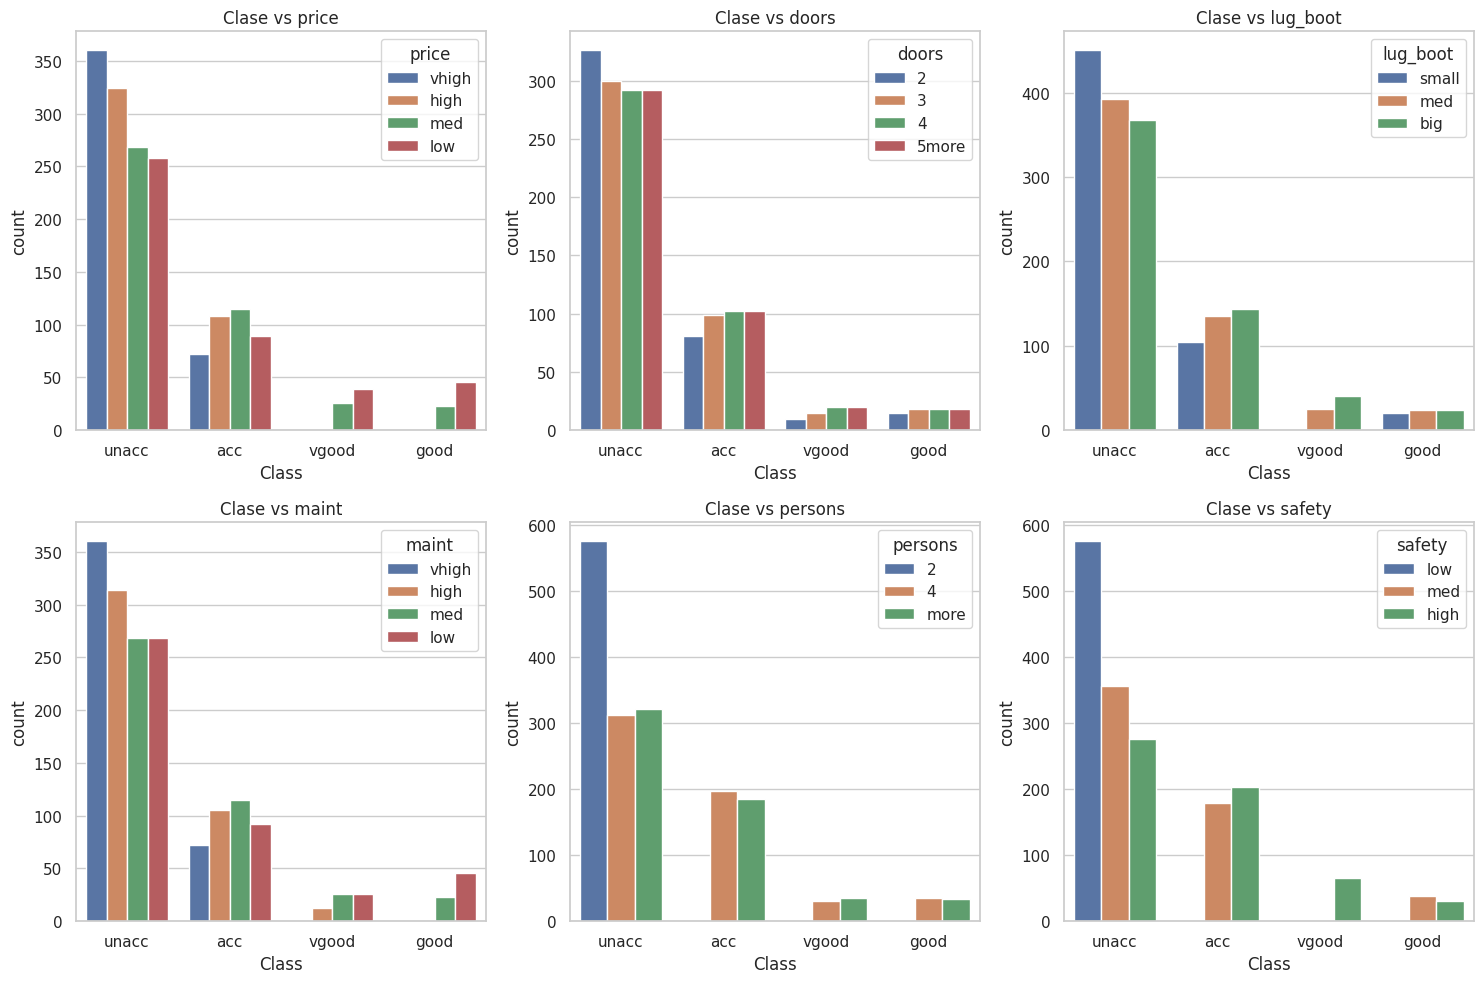

In [22]:
# --- 2. LIMPIEZA Y EXPLORACIÓN ---

# Verificamos valores nulos
print(f"Valores nulos por columna:\n{df_car.isnull().sum()}")

# Verificamos duplicados
print(f"Duplicados encontrados: {df_car.duplicated().sum()}")
# Eliminamos duplicados si existen (opcional, depende del contexto, aquí no lo hacemos explícito en el código original pero es buena práctica)
# df_car.drop_duplicates(inplace=True)

# Función para ver conteo y proporción
def dist(df, target):
    count = df[target].value_counts(normalize=False)
    prop = df[target].value_counts(normalize=True)
    dist = pd.DataFrame({'Freq[N]': count, 'Prop[%]': prop.round(3)})
    return dist

# Analizamos la distribución de cada variable
print("\n--- Distribución de Variables ---")
for col in columns_names:
    print(f'Variable: {col.upper()}')
    print(dist(df_car, col))
    print("*"*30)

# Visualización gráfica
print("\n--- Relación entre Variables y la Clase ---")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, variable in enumerate(columns_names[:-1]): # Excluimos 'Class' del loop
    row = i % 2
    col = i // 2
    sns.countplot(data=df_car, x='Class', hue=variable, ax=axes[row][col])
    axes[row][col].set_title(f"Clase vs {variable}")

plt.tight_layout()
plt.show()

### 6.2. Preprocesamiento: Balanceo y Codificación
1.  **Balanceo:** Al igual que en el Titanic, si hay clases desproporcionadas, usamos `RandomUnderSampler`.
2.  **Codificación (Encoding):** Los árboles de decisión en `scikit-learn` requieren números. Usamos `OrdinalEncoder` para convertir categorías como "low", "med", "high" en números 1, 2, 3, preservando el orden lógico.

In [23]:
# --- 3. PREPROCESAMIENTO ---
from imblearn.under_sampling import RandomUnderSampler
import category_encoders as ce 

# Separamos Features (X) y Target (y)
X_car = df_car.drop('Class', axis=1)
y_car = df_car.Class

# 1. Balanceo de datos
undersample = RandomUnderSampler(random_state=42)
X_car_bal, y_car_bal = undersample.fit_resample(X_car, y_car)

print("Dimensiones después del balanceo:", X_car_bal.shape)

# 2. Codificación Ordinal (Categoría -> Número)
# Instalamos la librería si es necesario
# %pip install category_encoders

# Definimos el encoder para las columnas categóricas
encoder = ce.OrdinalEncoder(cols=columns_names[:-1])

# Transformamos las variables
X_car_encoded = encoder.fit_transform(X_car_bal)

print("\n--- Datos Codificados (Primeras filas) ---")
display(X_car_encoded.head())
print("\nTipos de datos:", X_car_encoded.dtypes)

Dimensiones después del balanceo: (260, 6)

--- Datos Codificados (Primeras filas) ---


,price,maint,doors,persons,lug_boot,safety
1132,1,1,1,1,1,1
1078,1,2,2,1,1,1
1483,2,2,3,1,1,1
1415,2,2,4,2,2,2
395,3,3,3,2,1,2



Tipos de datos: price       int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object


### 6.3. Entrenamiento y Optimización
Dividimos en Train/Test y buscamos los mejores hiperparámetros (`max_depth`, `criterion`) para nuestro árbol.

In [24]:
# --- 4. ENTRENAMIENTO ---
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# División Train/Test (70% Train, 30% Test)
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X_car_encoded, y_car_bal, test_size=0.3, random_state=42)

print(f'Tamaño Train: {X_train_car.shape}, Tamaño Test: {X_test_car.shape}')

# Definición del modelo y GridSearch
tree_car = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [2, 3, 4, 5, 6, 8, 10] # Ampliamos un poco el rango
}

grid_search = GridSearchCV(tree_car, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_car, y_train_car)

print("\n--- Resultados Optimización ---")
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor Score (CV):", grid_search.best_score_)

best_tree_car = grid_search.best_estimator_

Tamaño Train: (182, 6), Tamaño Test: (78, 6)

--- Resultados Optimización ---
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 8}
Mejor Score (CV): 0.8789473684210526

--- Resultados Optimización ---
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 8}
Mejor Score (CV): 0.8789473684210526


### 6.4. Evaluación del Modelo
Analizamos el rendimiento del modelo en los datos de prueba.

Accuracy Train: 0.9670
Accuracy Test: 0.8462

--- Reporte de Clasificación (Test) ---
              precision    recall  f1-score   support

         acc       0.68      0.81      0.74        16
        good       0.86      0.78      0.82        23
       unacc       0.94      0.80      0.86        20
       vgood       0.90      1.00      0.95        19

    accuracy                           0.85        78
   macro avg       0.85      0.85      0.84        78
weighted avg       0.85      0.85      0.85        78


--- Matriz de Confusión ---


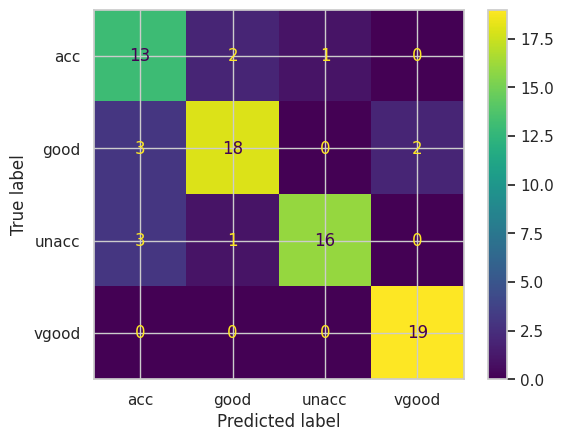

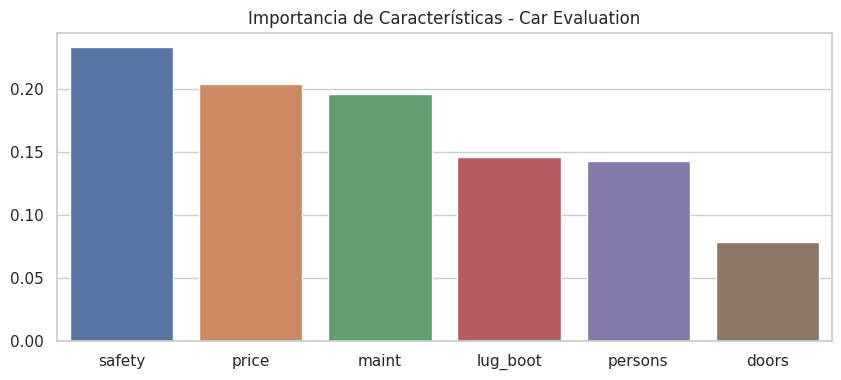

In [25]:
# --- 5. EVALUACIÓN ---
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones
y_train_pred_tree_car = best_tree_car.predict(X_train_car)
y_test_pred_tree_car = best_tree_car.predict(X_test_car)

# Accuracy
train_acc = accuracy_score(y_train_car, y_train_pred_tree_car)
test_acc = accuracy_score(y_test_car, y_test_pred_tree_car)

print(f"Accuracy Train: {train_acc:.4f}")
print(f"Accuracy Test: {test_acc:.4f}")

# Reporte de Clasificación
print("\n--- Reporte de Clasificación (Test) ---")
print(classification_report(y_test_car, y_test_pred_tree_car))

# Matriz de Confusión
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test_car, y_test_pred_tree_car, labels=best_tree_car.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree_car.classes_)
disp.plot()
plt.show()

# Importancia de Características
feature_scores_car = pd.DataFrame(pd.Series(best_tree_car.feature_importances_, index=X_train_car.columns).sort_values(ascending=False)).T
plt.figure(figsize=(10,4))
sns.barplot(data=feature_scores_car)
plt.title("Importancia de Características - Car Evaluation")
plt.show()